# Quantifying Temporal Land Cover Change Using *rioxarray*

In [1]:
import rioxarray as rx
import rasterio 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
# Open the file and return an object that we store in a variable
Ecuador1999 = rx.open_rasterio("Ecuador_Landcover_1999_v3.tif")
Ecuador2014 = rx.open_rasterio("Ecuador_Landcover_2014_v3.tif")
Ecuador2018 = rx.open_rasterio("Ecuador_Landcover_2018_v3.tif")

In [3]:
# The scale of the area is too large to run. Thus, clip the images to a local scale using a geometry window (polygon).
geometry = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [-80.00, -2.256],
            [-80.00, -2.165],
            [-79.954, -2.165],
            [-79.954, -2.256],
            [-80.00, -2.256]
        ]]
    }
]

In [5]:
# Clip images to the scale of 'geometry'.
Clip1999 = Ecuador1999.rio.clip(geometry)
Clip2014 = Ecuador2014.rio.clip(geometry)
Clip2018 = Ecuador2018.rio.clip(geometry)

In [6]:
# The output tells us that we are looking at an xarray.DataArray, with 1 band, 681 columns, and 344 rows.
# The values in the array are land cover numbers.
Clip1999

<xarray.DataArray (band: 1, y: 681, x: 344)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1]]], dtype=uint8)
Coordinates:
  * y            (y) float64 -2.165 -2.165 -2.165 ... -2.256 -2.256 -2.256
  * x            (x) float64 -80.0 -80.0 -80.0 -80.0 ... -79.95 -79.95 -79.95
  * band         (band) int32 1
    spatial_ref  int32 0
Attributes:
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  0.9778030043509535
    STATISTICS_MAXIMUM:      6
    STATISTICS_MEAN:         4.1860020262314
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.98883922067794
    scale_factor:            1.0
    add_offset:              0.0
    grid_mapping:            spatial_ref
    _FillValue:              0

No handles with labels found to put in legend.


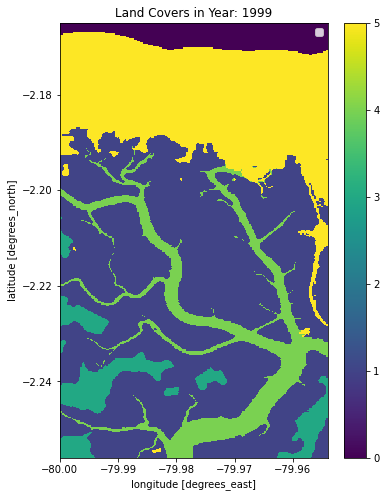

In [7]:
# Use the Plot function to visualize this raster with spatial coordinates on the x and y axis
plt.figure(figsize=(6,8))
Clip1999.plot()
plt.title("Land Covers in Year: 1999")
plt.legend()

Text(0.5, 1.0, 'Land Covers in Year: 2014')

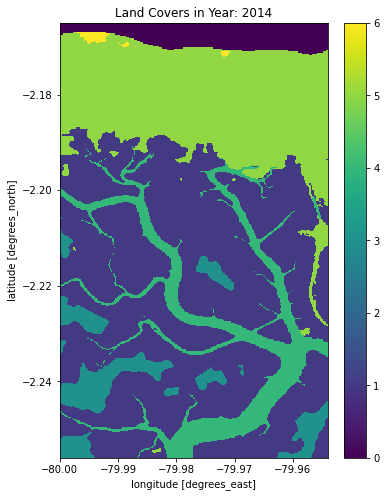

In [61]:
plt.figure(figsize=(6,8))
Clip2014.plot()
plt.title("Land Covers in Year: 2014")

Text(0.5, 1.0, 'Land Covers in Year: 2018')

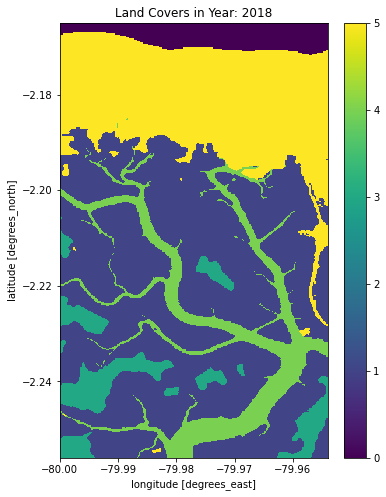

In [8]:
plt.figure(figsize=(6,8))
Clip2018.plot()
plt.title("Land Covers in Year: 2018")

In [20]:
change01 = Clip2014 - Clip1999
change02 = Clip2018 - Clip2014

In [21]:
# problem with negative values
print(change01.values.min(),change01.values.max())

0 255


In [22]:
print(np.percentile(change01, 99.59))

3.0


## If it changed, call it a change

In [84]:
# fix value:255 issue by assigning new values to this array using .where
change01 = change01.where(change01 == 0, other = 1)
change02 = change02.where(change02 == 0, other = 1)
change_all = change01 + change02

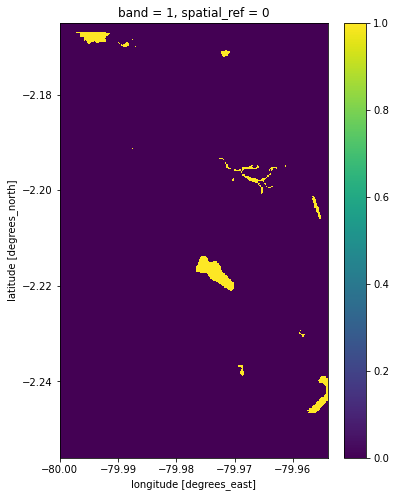

In [85]:
plt.figure(figsize=(6,8))
change01.plot()

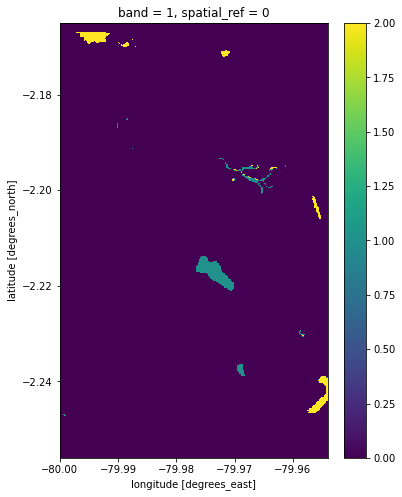

In [26]:
plt.figure(figsize=(6,8))
change_all.plot()

## Just one class
**The previous example shows the change of all categories. If we only want to focus on and view one category, we can use a similar approach.**

In [65]:
# Water is category 4.
water1999 = Clip1999.where(Clip1999 == 4, other = 0)
water2014 = Clip2014.where(Clip2014 == 4, other = 0)
water2018 = Clip2018.where(Clip2018 == 4, other = 0)

No handles with labels found to put in legend.


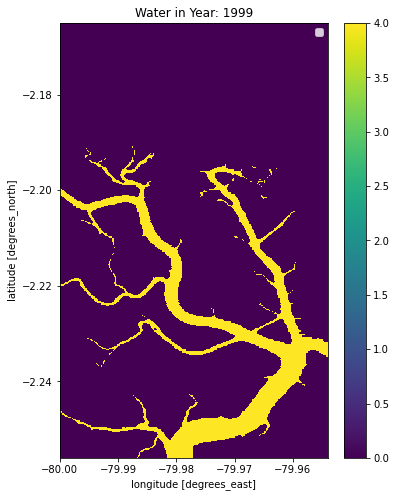

In [66]:
# Use the Plot function to visualize this raster with spatial coordinates on the x and y axis
plt.figure(figsize=(6,8))
water1999.plot()
plt.title("Water in Year: 1999")
plt.legend()

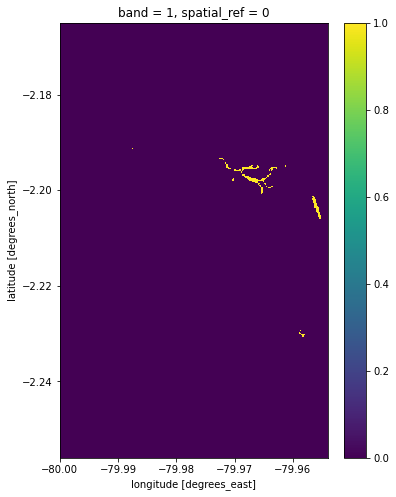

In [81]:
# Similarly, assign new values to dataarray
water01 = (water2014 - water1999).where((water2014 - water1999)==0, other = 1 )
water02 = (water2018 - water2014).where((water2018 - water2014)==0, other = 1 )
water_all = water01 + water02
plt.figure(figsize=(6,8))
# Plot change of water over the first time period
water01.plot()

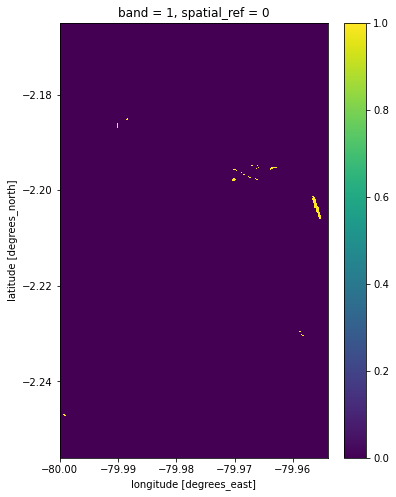

In [82]:
# Plot change of water over the second time period
plt.figure(figsize=(6,8))
water02.plot()

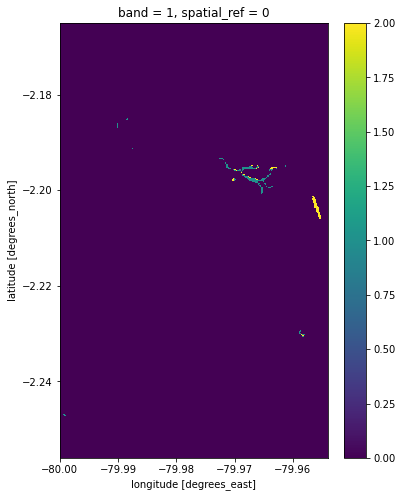

In [83]:
# See how some water pixels changed twice
plt.figure(figsize=(6,8))
water_all.plot()